# this is Heart Disease Prediction Project 


# 1-Problem Defination 
  we are going to predict based on data whether someone have heart disease or not 

# 2- Data 
 We have the data and have loaded it  already 

# 3- Evaluate 
 In Intial stages we need to make sure if our model gives us accuracy of 95%

 # 4 - Features 
what are columns giving us Information we need to understand the importance of each column 

# Tools Prepartion 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
# Importing models of sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
# Import Evaluation Libraries 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay 

# Exploring the Data Initial Stage

In [2]:
df = pd.read_csv("processed_heart_disease_data.csv")
df.shape

(295, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,1,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,1,108,1,1.5,1,3,0,1
2,67,1,3,120,229,0,1,129,1,2.6,1,2,1,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,0,0
4,41,0,1,130,204,0,1,172,0,1.4,0,0,0,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
290,68,1,3,144,193,1,0,141,0,3.4,1,2,1,1
291,57,1,3,130,131,0,0,115,1,1.2,1,1,1,1
292,57,0,1,130,236,0,1,174,0,0.0,1,1,0,1
293,47,1,3,150,226,0,0,98,1,1.5,1,0,1,1
294,56,1,3,120,100,0,0,120,1,1.5,1,0,1,1


In [5]:
df["target"].value_counts()

target
0    159
1    136
Name: count, dtype: int64

<Axes: xlabel='target'>

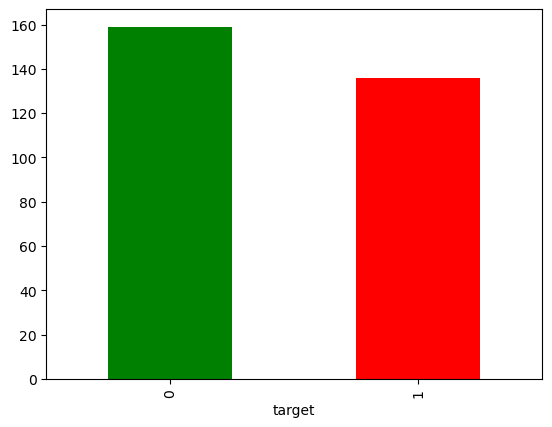

In [6]:
df["target"].value_counts().plot(kind = 'bar', color=["green","red"])

In [7]:
df.isna().sum() # Are there any missing values?

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,295.000000,295.000000,295.000000,295.00000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,54.433898,0.684746,2.155932,131.59661,246.583051,0.145763,0.494915,149.647458,0.328814,1.035932,0.596610,0.667797,0.508475,0.461017
std,9.001977,0.465407,0.966843,17.60614,52.380077,0.353468,0.500824,23.083650,0.470580,1.144670,0.614442,0.932125,0.605330,0.499325
min,29.000000,0.000000,0.000000,94.00000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,2.000000,120.00000,211.500000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.00000,242.000000,0.000000,0.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.00000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000,1.000000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.000000,1.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [9]:
df.sex.value_counts()

sex
1    202
0     93
Name: count, dtype: int64

In [10]:
206/294

0.7006802721088435

In [11]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,70,89
1,23,113


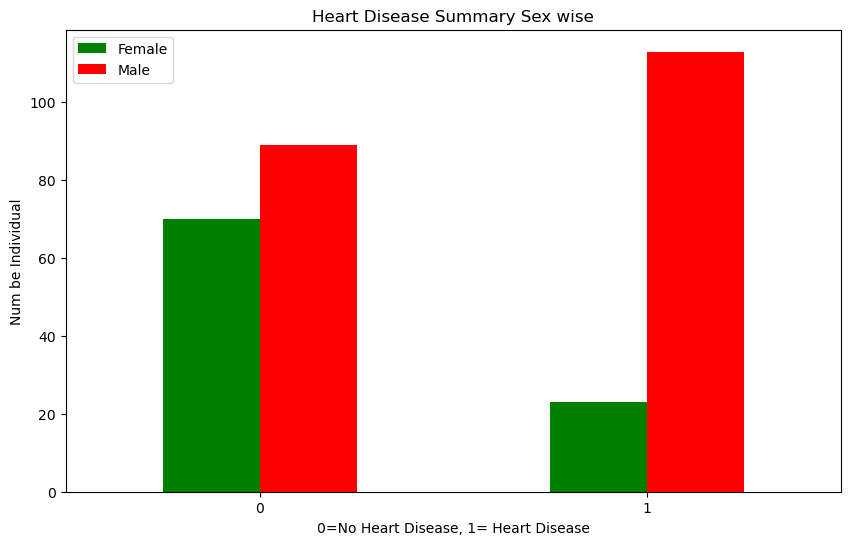

In [12]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=["green","red"])
plt.title('Heart Disease Summary Sex wise')
plt.xlabel("0=No Heart Disease, 1= Heart Disease")
plt.ylabel("Num be Individual")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

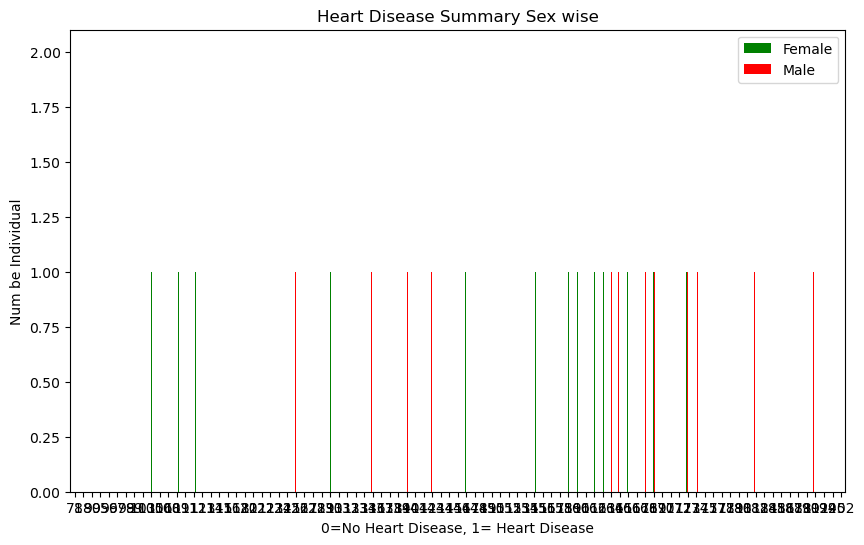

In [13]:
# Finding Patterns in Data Using Scattter plot 
pd.crosstab(df.thalch,df.age).plot(kind='bar',
                                  figsize=(10,6),
                                  color=["green","red"])
plt.title('Heart Disease Summary Sex wise')
plt.xlabel("0=No Heart Disease, 1= Heart Disease")
plt.ylabel("Num be Individual")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [14]:
df.thalch.value_counts()

thalch
162    11
160     9
163     9
152     8
150     7
       ..
177     1
127     1
97      1
190     1
98      1
Name: count, Length: 91, dtype: int64

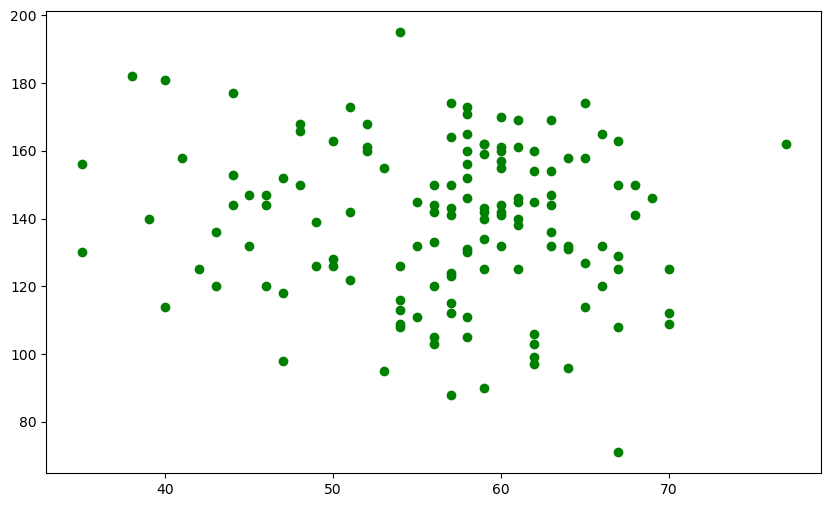

In [15]:
# Finding Patterns in Data Using Scatter Plot 
plt.figure(figsize=(10,6))
# Create scatter plot 
plt.scatter(df.age[df.target==1],df.thalch[df.target==1],c='green'); #target =1 means those who have heart disease 

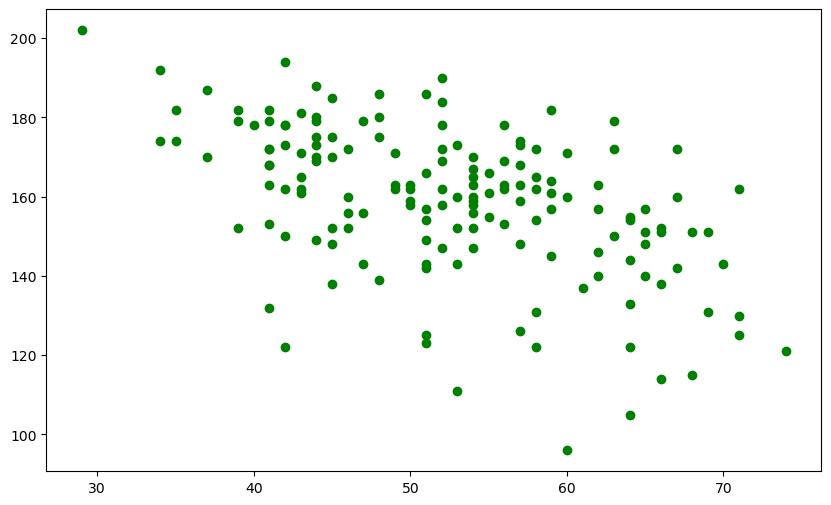

In [16]:
# Finding Patterns in Data Using Scatter Plot 
plt.figure(figsize=(10,6))
# Create scatter plot 
plt.scatter(df.age[df.target==0],df.thalch[df.target==0],c='green'); #target =0 means those who have not heart disease 

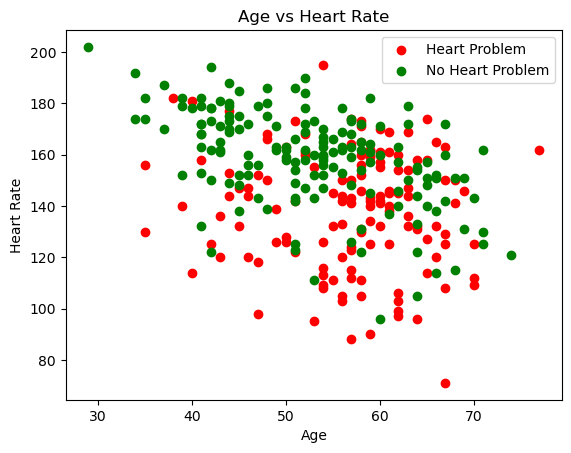

In [17]:
plt.scatter(df.age[df.target==1],df.thalch[df.target==1],c='red');
plt.scatter(df.age[df.target==0],df.thalch[df.target==0],c='green');
plt.title('Age vs Heart Rate')
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(["Heart Problem","No Heart Problem"]);

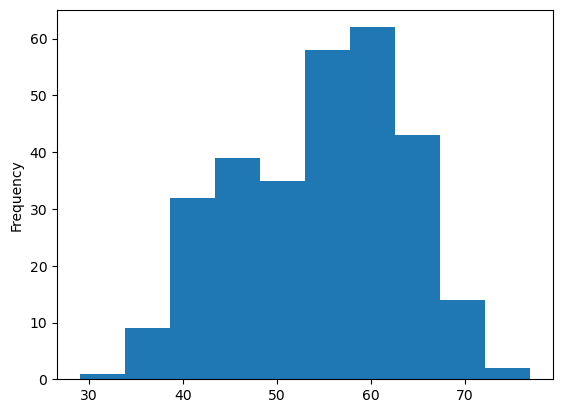

In [18]:
# create Histogram to see age Distribution
df.age.plot.hist();

In [19]:
df.cp.value_counts()
# 0 : typical angina: Chest pain due to decrease blood presure
# 1 : atypical angina : Chest Pain not related to Heart Problem
# 2 : non-anginal pain : Not Heart Related 
# 3 : asymptomic : Chest pain not showing Heart Problem

cp
3    141
2     82
1     49
0     23
Name: count, dtype: int64

In [20]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,16,7
1,40,9
2,64,18
3,39,102


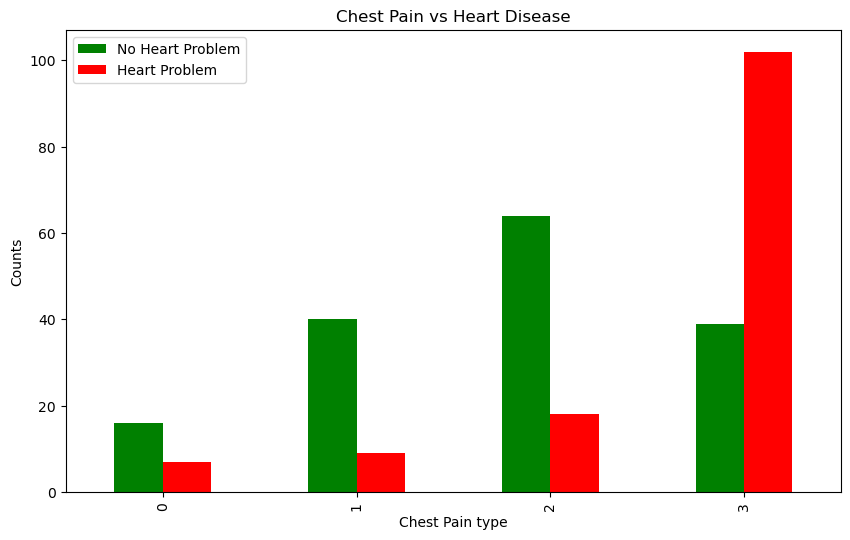

In [21]:
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize = (10,6),
                                 color=['green','red'])
plt.title("Chest Pain vs Heart Disease")
plt.xlabel("Chest Pain type")
plt.ylabel("Counts")
plt.legend(["No Heart Problem","Heart Problem"]);

# Correlation matrix 

In [22]:
df.corr()
#positive means if value increase it will also increase its corresponding value 
# negative means of value increase it will decrease its corresponding value

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.084147,0.109441,0.290274,0.208950,0.138263,0.152890,-0.378472,0.100296,0.197527,0.152280,0.373548,0.134150,0.233060
sex,-0.084147,1.000000,0.018910,-0.049611,-0.211071,0.032171,0.029581,-0.086682,0.164308,0.119660,0.041449,0.079229,0.377753,0.290894
cp,0.109441,0.018910,1.000000,-0.040652,0.055690,-0.056782,0.057839,-0.342111,0.380333,0.193153,0.146321,0.227513,0.236015,0.407183
trestbps,0.290274,-0.049611,-0.040652,1.000000,0.128851,0.185473,0.149244,-0.041084,0.055886,0.189699,0.125766,0.115955,0.169312,0.153161
chol,0.208950,-0.211071,0.055690,0.128851,1.000000,0.018726,0.174634,0.017443,0.041045,0.013191,-0.026380,0.115444,-0.056797,0.057833
fbs,0.138263,0.032171,-0.056782,0.185473,0.018726,1.000000,0.071450,-0.008688,-0.002842,0.015594,0.052398,0.157793,0.097536,0.003397
restecg,0.152890,0.029581,0.057839,0.149244,0.174634,0.071450,1.000000,-0.059881,0.072063,0.113050,0.131476,0.134805,0.030996,0.159021
thalch,-0.378472,-0.086682,-0.342111,-0.041084,0.017443,-0.008688,-0.059881,1.000000,-0.394473,-0.342433,-0.388241,-0.264711,-0.311606,-0.431743
exang,0.100296,0.164308,0.380333,0.055886,0.041045,-0.002842,0.072063,-0.394473,1.000000,0.293085,0.260313,0.149067,0.306611,0.423864
oldpeak,0.197527,0.119660,0.193153,0.189699,0.013191,0.015594,0.113050,-0.342433,0.293085,1.000000,0.570054,0.281555,0.316180,0.416648


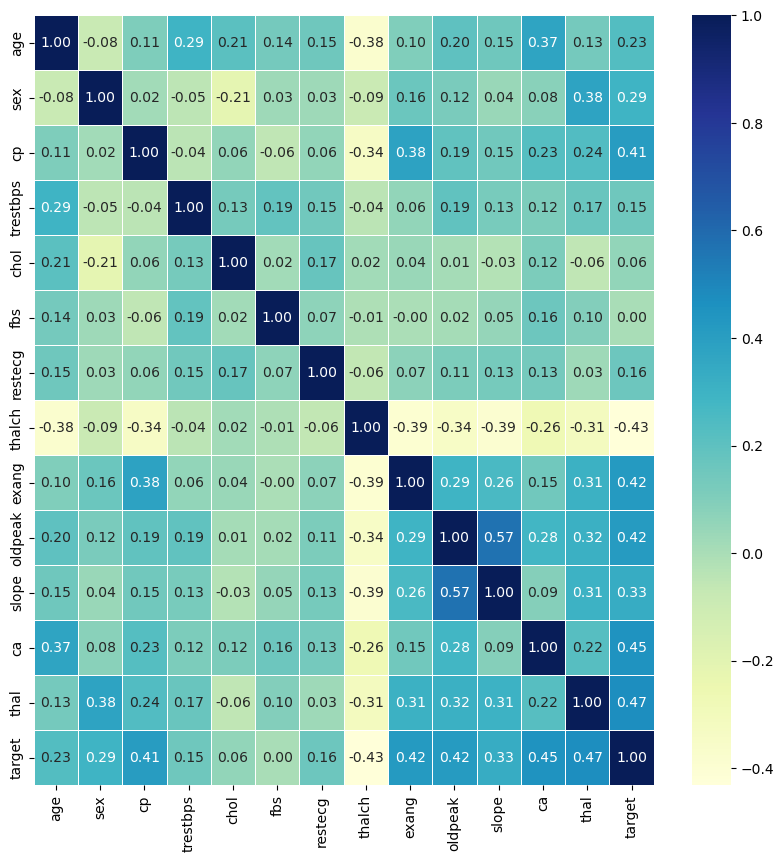

In [23]:
# lets draw Correlation Map
cor_map = df.corr()
home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(cor_map,
                  annot=True,
                  linewidths=0.5,
                  fmt="0.2f",
                  cmap="YlGnBu");

# 3. Modeling 

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,1,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,1,108,1,1.5,1,3,0,1
2,67,1,3,120,229,0,1,129,1,2.6,1,2,1,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,0,0
4,41,0,1,130,204,0,1,172,0,1.4,0,0,0,0


In [25]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
290,68,1,3,144,193,1,0,141,0,3.4,1,2,1,1
291,57,1,3,130,131,0,0,115,1,1.2,1,1,1,1
292,57,0,1,130,236,0,1,174,0,0.0,1,1,0,1
293,47,1,3,150,226,0,0,98,1,1.5,1,0,1,1
294,56,1,3,120,100,0,0,120,1,1.5,1,0,1,1


In [26]:
# Split into tests and train
X = df.drop("target",axis=1)
y = df["target"]

In [27]:
# using random seed to fix its value so it can be reusable 
np.random.seed(0)

# Split into tests and train data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [28]:
len(X)

295

In [29]:
len(X_test)

59

# Now chossing Model 
# visit sklearn .model selaction on google 
# The Models we are going to use 
1. K-Nearest Neighbours Classifers
2. Random Forest Classifiers
3. Logistic Regression

In [30]:
models = {"KNN":KNeighborsClassifier(),
         "Random Forest":RandomForestClassifier(),
         "Logistic Regression": LogisticRegression()}
# Create Function to Evaulate Model

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(0)
    # Make a Dictionary to score the Model 
    model_score = {}
    #looping through 
    for name,model in models.items():
        model.fit(X_train,y_train)
        #Evaluate the model and append it score 
        model_score[name]=model.score(X_test,y_test)
    return model_score
        

In [31]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

C:\Users\DELL\Desktop\AI-course\cardio_project_1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6610169491525424,
 'Random Forest': 0.7796610169491526,
 'Logistic Regression': 0.847457627118644}

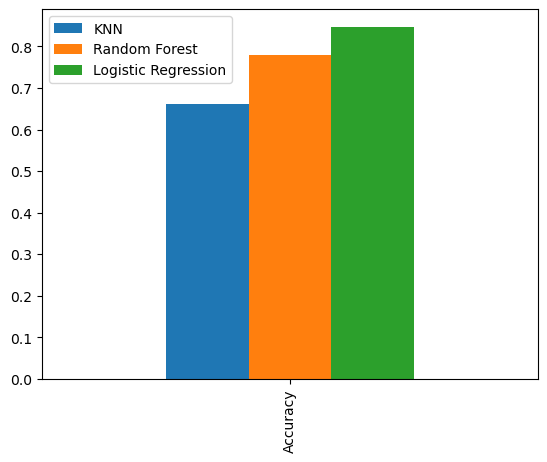

In [32]:
model_compare = pd.DataFrame(model_scores,index=["Accuracy"])
model_compare.plot.bar();

# Improving and Tuning the Model

In [33]:
KNN = KNeighborsClassifier()
KNN.set_params()

KNeighborsClassifier()

In [34]:
train_score = []
test_score = []
# Create range to the test for n_neighbors 
nneighbors = range(1,30)
# KNN Instance 
KNN = KNeighborsClassifier()
# looping through the range 
for i in nneighbors:
    KNN.set_params(n_neighbors=i)
    # Run the fit for ith value 
    KNN.fit(X_train,y_train)
    # Update the Training score
    train_score.append(KNN.score(X_train,y_train))
    # Update the test score list
    test_score.append(KNN.score(X_test,y_test))
train_score    

[1.0,
 0.7669491525423728,
 0.7796610169491526,
 0.7627118644067796,
 0.75,
 0.7245762711864406,
 0.7330508474576272,
 0.7245762711864406,
 0.7161016949152542,
 0.7245762711864406,
 0.7161016949152542,
 0.711864406779661,
 0.6991525423728814,
 0.6864406779661016,
 0.711864406779661,
 0.690677966101695,
 0.7203389830508474,
 0.7076271186440678,
 0.7288135593220338,
 0.7203389830508474,
 0.7245762711864406,
 0.6991525423728814,
 0.7330508474576272,
 0.7372881355932204,
 0.711864406779661,
 0.690677966101695,
 0.6949152542372882,
 0.6864406779661016,
 0.6949152542372882]

# Plot the Accuracy Score

Max KNN Score:72.88%


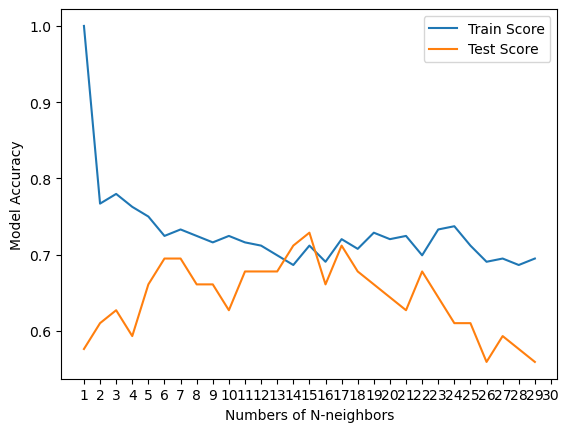

In [35]:
plt.plot(nneighbors,train_score,label="Train Score")
plt.plot(nneighbors,test_score,label="Test Score")
plt.xticks(np.arange(1,31,1))
plt.xlabel("Numbers of N-neighbors")
plt.ylabel("Model Accuracy")
plt.legend()
print(f"Max KNN Score:{max(test_score)*100:0.2f}%")

In [36]:
# here we can see we are not able to reach our score 95% so we are dropping KNN 

# Hyperparameter tunning using Randomized Search CV

In [37]:
# to find hyperparameters search logisticRegression on google 
# we have many parameters 
# to find search best hyperparameters on google 
LR_hp = {
    "C":np.logspace(-4,4,20 ),
    "solver":["liblinear"]
}
RFC_hp = {
    "n_estimators":np.arange(10,1600,100),
    "max_depth":[None,3,5,6,10],
    "min_samples_split":np.arange(2,20,2),
    "min_samples_leaf":np.arange(1,20,2)
}

In [38]:
# Tune logistic Regression 
np.random.seed(7)
# lets Use RSCV to tune HP
lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions=LR_hp,
                       cv=5,
                       n_iter = 20,
                       verbose=True)
# fit the random HP search model for LR
lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
lr.score(X_test,y_test)

0.847457627118644

In [40]:
lr.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [41]:
# # Tune RandomForest Classifier
# np.random.seed(7)
# # lets Use RSCV to tune HP
# rfc = RandomizedSearchCV(RandomForestClassifier(),
#                        param_distributions=RFC_hp,
#                        cv=5,
#                        n_iter = 20,
#                        verbose=True)
# # fit the random HP search model for LR
# rfc.fit(X_train,y_train)

In [42]:
rfc.score(X_test,y_test)

NameError: name 'rfc' is not defined

In [ ]:
rfc.best_params_

In [43]:
# Tune logistic Regression using GSCV
np.random.seed(7)
# lets Use RSCV to tune HP
lr_gs = GridSearchCV(LogisticRegression(),
                       param_grid=LR_hp,
                       cv=5,
                       verbose=True)
# fit the random HP search model for LR
lr_gs.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
lr_gs.score(X_test,y_test)

0.847457627118644

In [45]:
lr_gs.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [ ]:
# Tune RandomForestClassifier using GSCV
# np.random.seed(7)
# # lets Use RSCV to tune HP
# rfc_gs = GridSearchCV(RandomForestClassifier(),
#                        param_grid=RFC_hp,
#                        cv=5,
#                        verbose=True)
# # fit the random HP search model for LR
# rfc_gs.fit(X_train,y_train)

In [ ]:
# upper model will takes longer time 
# as we now that we started with KNN and increase its accuracy but could not acheive 
# we do Random FOrest and Logistics Regression and tune the Hyper parameters but 
# logistics Regression is same after tuning 

# Plotting the Area Under the Curve 

In [46]:
y_preds = lr_gs.predict(X_test)
RocCurveDisplay(lr_gs,X_test,y_test)

TypeError: RocCurveDisplay.__init__() takes 1 positional argument but 4 were given

# Confusion Matrix 

In [47]:
print(confusion_matrix(y_test,y_preds))

[[29  2]
 [ 7 21]]


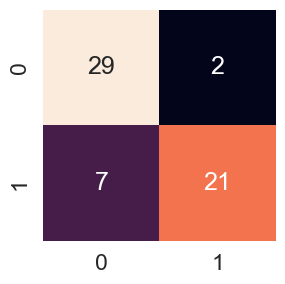

In [48]:
sns.set(font_scale=1.5)

def plot_confusion(y_test,y_preds):
    "This will plot the Confusion Matrix"
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)

plot_confusion(y_test,y_preds)
    

# Lets Plot the Classification Report 

In [49]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        31
           1       0.91      0.75      0.82        28

    accuracy                           0.85        59
   macro avg       0.86      0.84      0.84        59
weighted avg       0.86      0.85      0.85        59



In [50]:
lr_gs.best_params_
lr = LogisticRegression(C=1.623776739188721,
                       solver="liblinear")

In [51]:
# Cross Validation Accuracy 

cv_accuracy = cross_val_score(lr,
                              X,
                              y,
                              cv=7,
                              scoring="accuracy")
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8405315614617939

In [52]:
# Cross Validation Presicion 

cv_precision = cross_val_score(lr,
                              X,
                              y,
                              cv=7,
                              scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8450039664988803

In [53]:
# Cross Validation recall

cv_recall = cross_val_score(lr,
                              X,
                              y,
                              cv=7,
                              scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8101503759398497

In [54]:
# Cross Validation f1_score

cv_f1 = cross_val_score(lr, 
                       X,
                              y,
                              cv=7,
                              scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8235727795878172

# Visualizing the cross Validated Matrices 

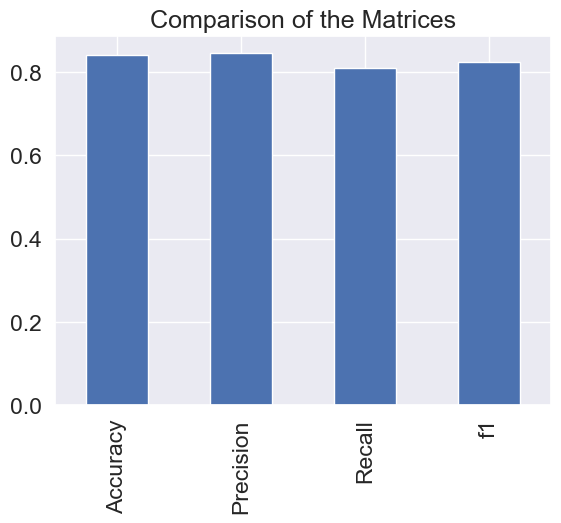

In [55]:
cv_plot = pd.DataFrame({
    "Accuracy":cv_accuracy,
    "Precision":cv_precision,
    "Recall":cv_recall,
    "f1":cv_f1
},index=[0])
cv_plot.T.plot.bar(title="Comparison of the Matrices",
                  legend=False);

# Features Improving 

In [56]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,1,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,1,108,1,1.5,1,3,0,1
2,67,1,3,120,229,0,1,129,1,2.6,1,2,1,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,0,0
4,41,0,1,130,204,0,1,172,0,1.4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,68,1,3,144,193,1,0,141,0,3.4,1,2,1,1
291,57,1,3,130,131,0,0,115,1,1.2,1,1,1,1
292,57,0,1,130,236,0,1,174,0,0.0,1,1,0,1
293,47,1,3,150,226,0,0,98,1,1.5,1,0,1,1


In [57]:
# Check Coefficent 
lr.fit(X_train,y_train)
lr.coef_

array([[-0.04235984,  0.8807736 ,  0.50786484,  0.0240684 ,  0.00615227,
        -0.68565878,  0.21474283, -0.03432186,  0.9841338 ,  0.17091905,
         0.40491404,  1.15446592,  0.67955947]])

In [58]:
final_coef = dict(zip(df.columns,list(lr.coef_[0])))
final_coef

{'age': -0.042359842001719855,
 'sex': 0.8807736038404608,
 'cp': 0.507864841401486,
 'trestbps': 0.02406840347316252,
 'chol': 0.006152267673807294,
 'fbs': -0.6856587806101563,
 'restecg': 0.21474282588215304,
 'thalch': -0.034321860700994605,
 'exang': 0.9841337951435473,
 'oldpeak': 0.170919052957188,
 'slope': 0.40491403852792807,
 'ca': 1.1544659180811574,
 'thal': 0.679559469568252}

# Conclusion

In [ ]:
we set 95% accuracy goal , but we did not meet 
we can ask some Questions 
What if we try to get more data suppose 1000 samples or around 50k samples 
What if we try to improve the Quality of Data 
What if we try to use other model to see of there is any improvements in results or not